# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

C:\Users\ABC\AppData\Local\Temp\ipykernel_20588\2682533802.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rafraf
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | wenchang
Processing Record 6 of Set 1 | port augusta
Processing Record 7 of Set 1 | krasnoshchekovo
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | yur'yevets
Processing Record 10 of Set 1 | wagar
Processing Record 11 of Set 1 | smithers
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | ambovombe
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | okha
Processing Record 17 of Set 1 | north bend
Processing Record 18 of Set 1 | tralee
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | harnai
Processing Record 22 of Set 1 | new norfolk
Processi

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rafraf,37.1904,10.1837,285.32,79,89,10.83,TN,1709317854
1,adamstown,-25.0660,-130.1015,299.10,76,8,2.50,PN,1709317710
2,whitehorse,60.7161,-135.0538,253.58,58,40,5.14,CA,1709317743
3,wenchang,30.9040,118.4887,273.73,78,8,0.43,CN,1709317856
4,port augusta,-32.5000,137.7667,295.32,56,100,5.64,AU,1709317856


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rafraf,37.1904,10.1837,285.32,79,89,10.83,TN,1709317854
1,adamstown,-25.0660,-130.1015,299.10,76,8,2.50,PN,1709317710
2,whitehorse,60.7161,-135.0538,253.58,58,40,5.14,CA,1709317743
3,wenchang,30.9040,118.4887,273.73,78,8,0.43,CN,1709317856
4,port augusta,-32.5000,137.7667,295.32,56,100,5.64,AU,1709317856


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [11]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

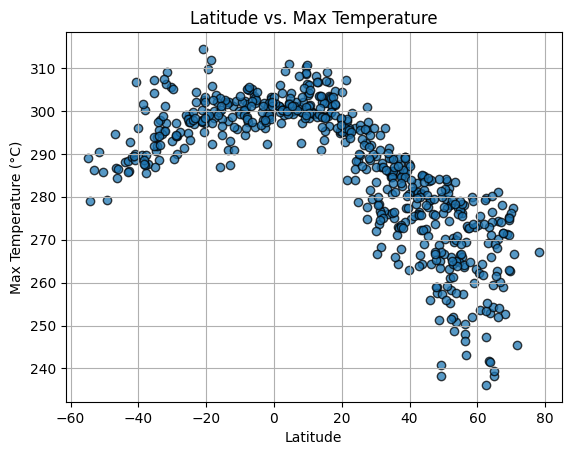

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

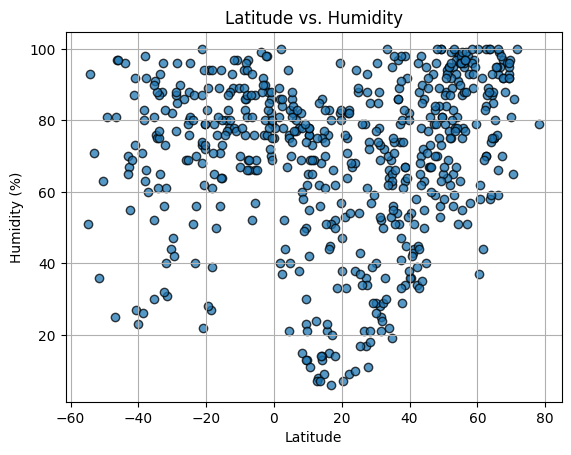

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

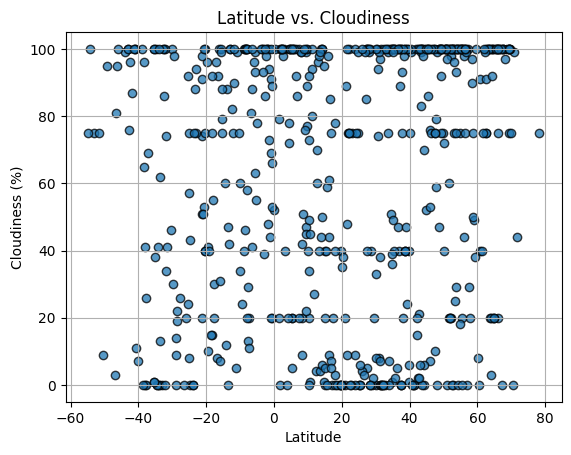

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

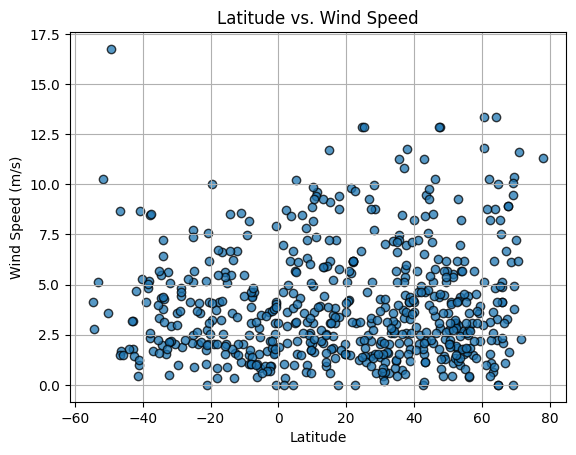

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors='black', alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regress_values, color='red')

    # Annotate the linear regression equation
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red',
                 bbox=dict(boxstyle="round, pad=0.3", edgecolor="none", facecolor="white", alpha=0.7))

    # Label plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f"The r-squared value is: {rvalue**2}")

    # Show the plot
    plt.show()

    

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rafraf,37.1904,10.1837,285.32,79,89,10.83,TN,1709317854
2,whitehorse,60.7161,-135.0538,253.58,58,40,5.14,CA,1709317743
3,wenchang,30.9040,118.4887,273.73,78,8,0.43,CN,1709317856
5,krasnoshchekovo,51.6708,82.7289,263.26,95,100,1.11,RU,1709317857
7,yur'yevets,57.3201,43.1041,272.82,98,100,1.49,RU,1709317857


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,299.10,76,8,2.50,PN,1709317710
4,port augusta,-32.5000,137.7667,295.32,56,100,5.64,AU,1709317856
6,punta arenas,-53.1500,-70.9167,286.21,71,75,5.14,CL,1709317822
11,west island,-12.1568,96.8225,301.14,89,75,6.69,CC,1709317712
12,ambovombe,-25.1667,46.0833,297.40,80,57,7.73,MG,1709317859


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7086048831943463


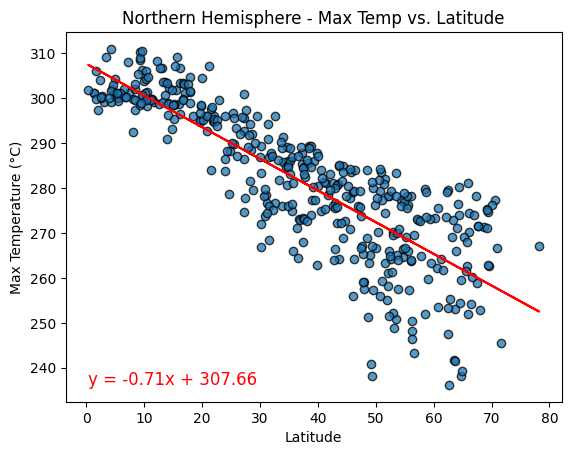

In [39]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (°C)', 'Northern Hemisphere - Max Temp vs. Latitude')

The r-squared value is: 0.32204134849154287


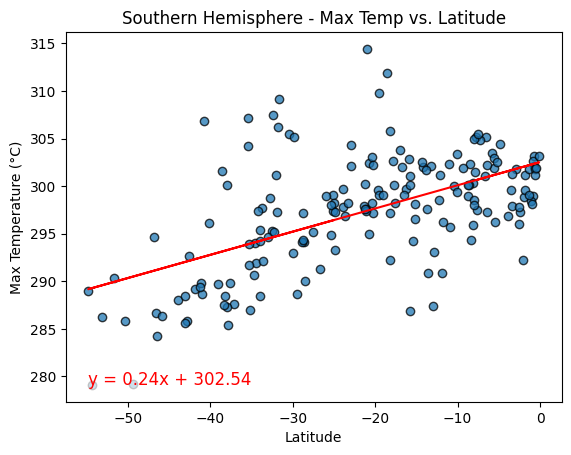

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (°C)', 'Southern Hemisphere - Max Temp vs. Latitude')

**Discussion about the linear relationship:** 
1. In Northern Hemisphere, the max temperature decreases as the latitude increases.
2. On the other hand, in Southern Hemisphere, the max temperature increases as the latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.16506425184762888


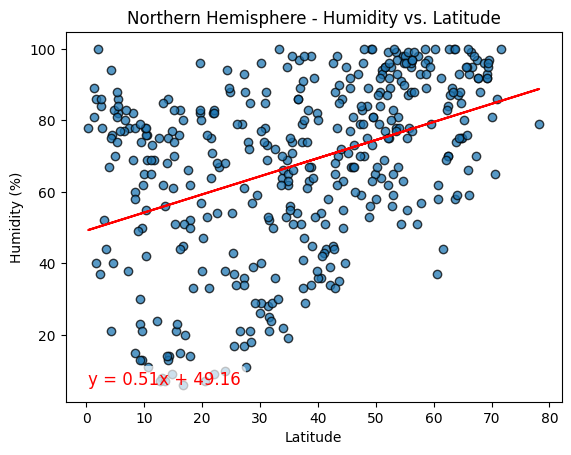

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity (%)', 'Northern Hemisphere - Humidity vs. Latitude')

The r-squared value is: 0.06481624411323897


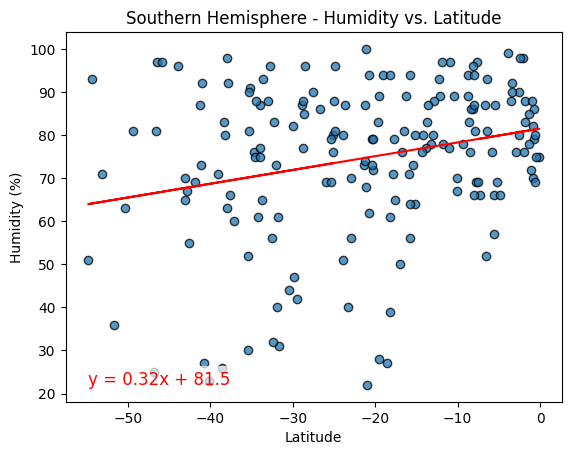

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity (%)', 'Southern Hemisphere - Humidity vs. Latitude')

**Discussion about the linear relationship:**
1. In Northern and Southern Hemisphere, the humidity increases as the latitude increases.
2. However, in Northern Hemisphere, this trend is more significant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.034107596261395846


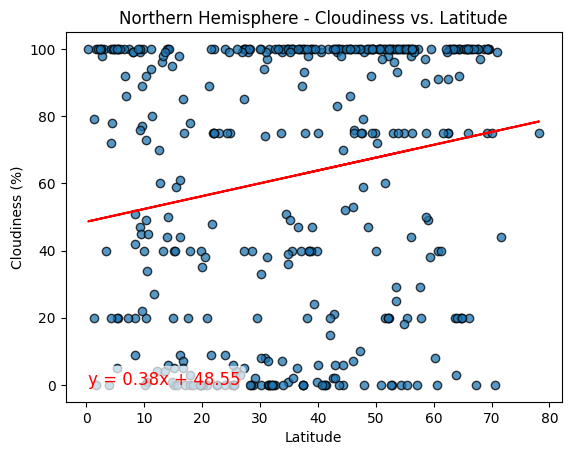

In [40]:
# Northern Hemisphere
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values_northern, y_values_northern, 'Latitude', 'Cloudiness (%)', 'Northern Hemisphere - Cloudiness vs. Latitude')

The r-squared value is: 0.01672914304006992


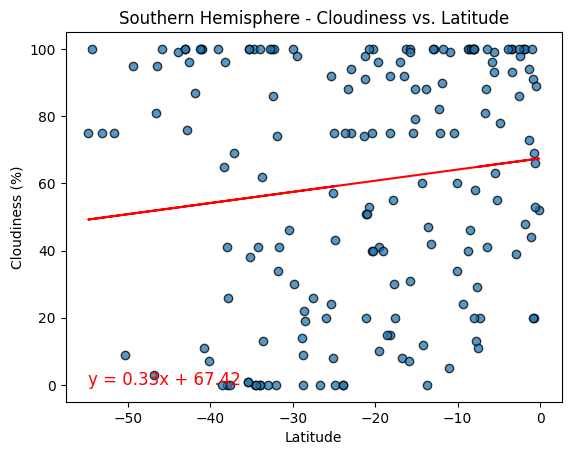

In [28]:
# Southern Hemisphere
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values_southern, y_values_southern, 'Latitude', 'Cloudiness (%)', 'Southern Hemisphere - Cloudiness vs. Latitude')

**Discussion about the linear relationship:** 
1. In Northern and Southern Hemisphere, the spread in the data points indicates that the relationship between the variables is not very tight or well-defined. Even though there's a general trend, the correlation between the variables is relatively weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.0011535640544213343


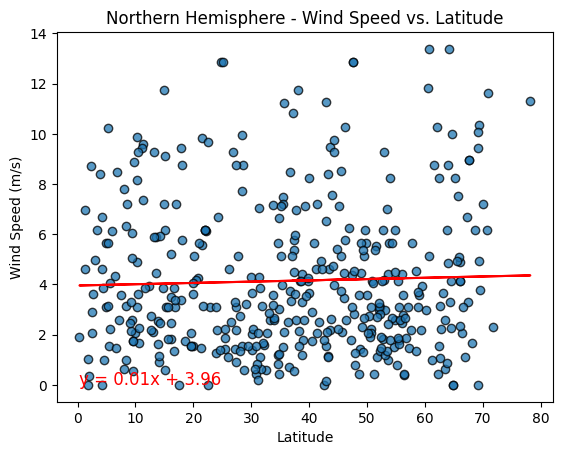

In [29]:
# Northern Hemisphere
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values_northern, y_values_northern, 'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere - Wind Speed vs. Latitude')

The r-squared value is: 0.048984128662242235


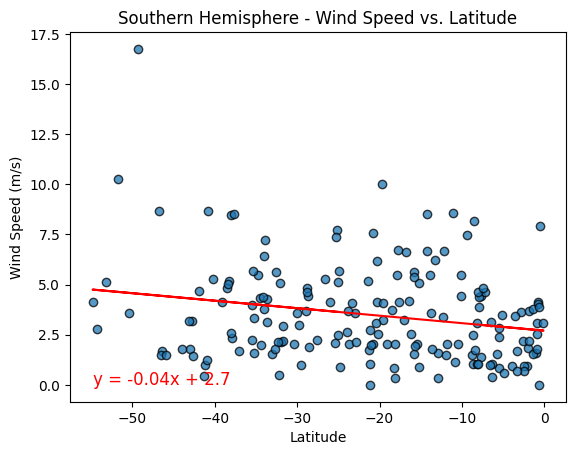

In [30]:
# Southern Hemisphere
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values_southern, y_values_southern, 'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere - Wind Speed vs. Latitude')

**Discussion about the linear relationship:**
In Northern Hemisphere, a horizontal straight line of regression indicates that there is no significant linear relationship between the dependent variable and the independent variable. 